```
This software is a part of GPU Ocean.

Copyright (C) 2019  SINTEF Digital

Producing plots of data-assimilation and drift trajectory forecasting 
experiments by post-processing the files produced by 
scripts/run_experiment.py

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.
```

# Post Processing of Data Assimilation experiments

## Set environment

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from matplotlib import pyplot as plt

import os
import sys
import datetime

from importlib import reload
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../../')))


In [3]:
timestamp = datetime.datetime.now().strftime("%Y_%m_%d-%H_%M_%S")


## Specify the folder containing the results

NB - You should match the `result_dir` with the variable `main_title`

In [4]:
host = os.uname()[1] 
if host in ["r740-5hdn2s2-ag-gcompute", "r740-5hcv2s2-ag-gcompute", "r740-dsxm2t2-ag-gcompute", "r740-dsws2t2-ag-gcompute"]:
    host = "ppi"

result_dirs = None
if host == "ppi":
    result_dirs = '/lustre/storeB/users/florianb/forecasting_results/'
elif host == "havvarsel":
    result_dirs = '/sintef/forecasting_results/'
else:
    print('Give path manually')

if result_dirs is not None:
    for f in sorted(os.listdir(result_dirs)):
        if f.startswith("performance"):
            print(f)

performance_experiment_2022_03_02-14_50_09
performance_experiment_2022_03_03-09_58_53


In [7]:
result_dir = os.path.abspath('/sintef/forecasting_results/performance_experiment_2022_03_03-09_58_53')

print(result_dir)

#main_title = "No data assimilation"
#main_title = "Ten drifters"
#main_title = "All drifters"
main_title = "All moorings"
#main_title = "West moorings"
#main_title = "South moorings"

assert(os.path.isdir(result_dir)), "Directory which is supposed to contain the results does not exist"

/sintef/forecasting_results/performance_experiment_2022_03_03-09_58_53


In [8]:
performance = np.load(result_dir + "/computation_times.npy")

In [9]:
times_mc    = performance[0]
times_iewpf = performance[1]
times_letkf = performance[2]

In [10]:
avg_times_mc    = np.average(times_mc,axis=1)
avg_times_iewpf = np.average(times_iewpf,axis=1)
avg_times_letkf = np.average(times_letkf,axis=1)

In [11]:
print("STD in MC times per hours: ", np.std(times_mc,axis=1))
print("STD in IEWPF times per hour: ", np.std(times_iewpf,axis=1))
print("STD in LETKF times per hour: ", np.std(times_letkf,axis=1))

STD in MC times per hours:  [0. 0. 0.]
STD in IEWPF times per hour:  [0. 0. 0.]
STD in LETKF times per hour:  [0. 0. 0.]


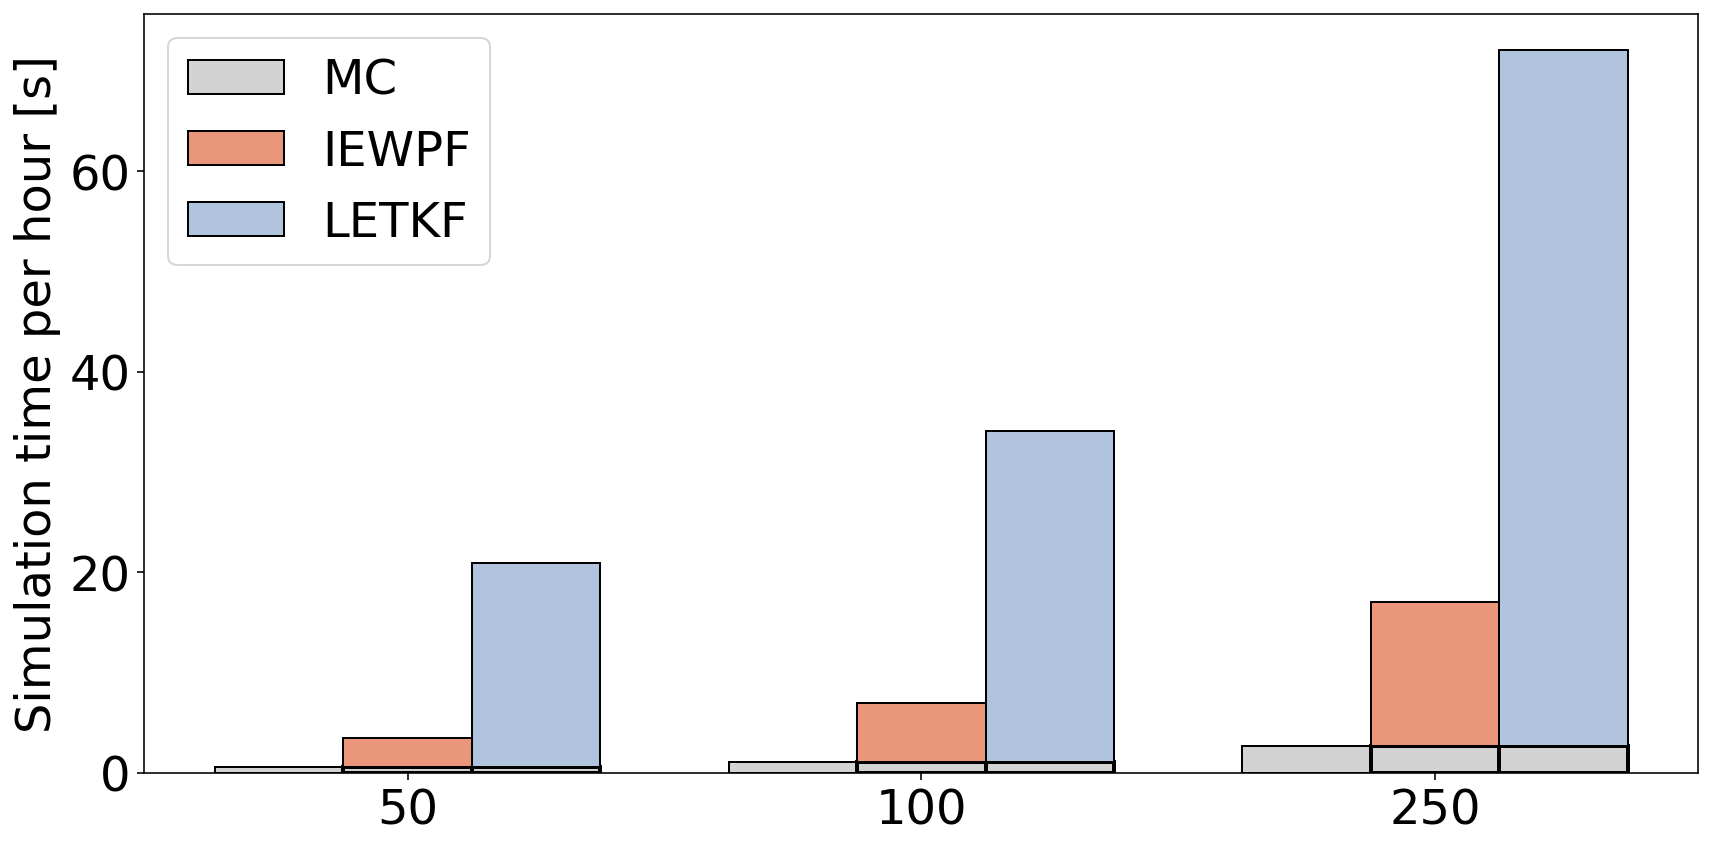

In [13]:
fig, ax = plt.subplots(figsize=(12,6))

width = 0.25

base = [0,1,2]

for i in base:
    bar_mc = ax.bar(i-width,avg_times_mc[i], width, color="lightgray", edgecolor="black", linewidth=1)
    ax.bar(i,avg_times_mc[i], width, color="lightgray", edgecolor="black", linewidth=2)
    ax.bar(i+width,avg_times_mc[i], width, color="lightgray", edgecolor="black", linewidth=2)

    bar_iewpf = ax.bar(i,avg_times_iewpf[i]-avg_times_mc[i], width, bottom=avg_times_mc[i], color="darksalmon", edgecolor="black", linewidth=1)

    bar_letkf = ax.bar(i+width,avg_times_letkf[i]-avg_times_mc[i], width, bottom=avg_times_mc[i], color="lightsteelblue", edgecolor="black", linewidth=1)

ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='minor', labelsize=24)

ax.set_xticks(base)
ax.set_xticklabels( ('50', '100', '250') )

ax.set_ylabel("Simulation time per hour [s]", fontsize=24)

ax.legend( (bar_mc[0],bar_iewpf[0],bar_letkf[0]), ('MC', 'IEWPF', 'LETKF'), prop={'size': 24} )

plt.tight_layout()

